In [1]:
import pandas as pd
from pandas_datareader import data as web
import numpy as np
import random
import seaborn as sns
from datetime import datetime 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
start = datetime(2015, 1, 1)
end = pd.datetime.now()

fb = web.get_data_yahoo('FB', start=start, end=end)[['Adj Close']]  

In [3]:
pd.set_option('precision', 2)
fb.columns = ['Close']
fb.tail()

,Close
Date,
2019-01-08,142.53
2019-01-09,144.23
2019-01-10,144.20
2019-01-11,143.80
2019-01-14,144.12


In [4]:
fb['Log'] = np.log(fb['Close'] / fb['Close'].shift(1))
fb['Avg'] = fb['Log'].rolling(20).mean()
fb['Std'] = fb['Log'].rolling(20).std()
fb['Z'] = ((fb['Log'] - fb['Avg']) / fb['Std']).round(2)
fb.dropna(inplace=True)

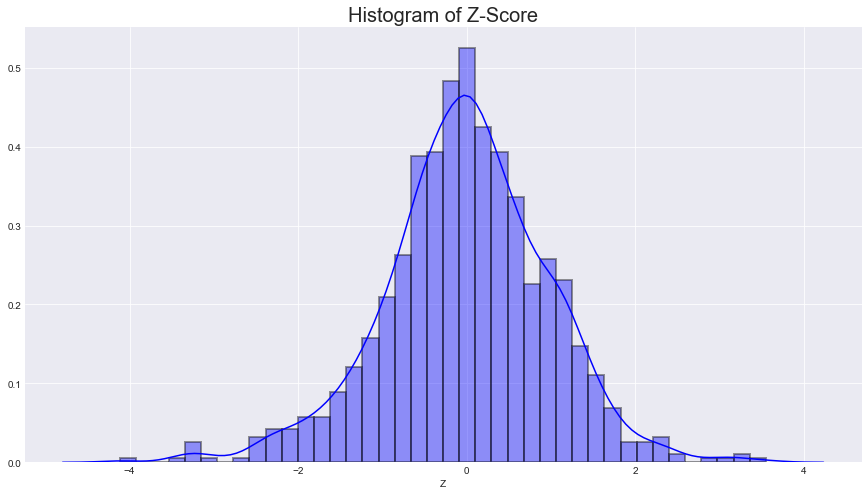

In [5]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.distplot(fb.Z, bins=40, color = 'blue',hist_kws=dict(edgecolor="black", linewidth=2));
plt.title('Histogram of Z-Score', size=20);

In [6]:
fb['Zgroup'] = np.where (fb.Z >=3, 1,np.where ((fb.Z >=2.5) & (fb.Z < 3),2,
                    np.where ((fb.Z >=2) & (fb.Z < 2.5),3,np.where ((fb.Z >=1.5) & (fb.Z < 2),4,
                    np.where ((fb.Z >=1) & (fb.Z < 1.5),5,np.where ((fb.Z >=0.5) & (fb.Z < 1),6,
                    np.where ((fb.Z >=0) & (fb.Z < 0.5),7,np.where ((fb.Z >=-0.5) & (fb.Z < 0),8,
                    np.where ((fb.Z >=-1) & (fb.Z <-0.5),9,np.where ((fb.Z >=-1.5) & (fb.Z < -1),10,
                    np.where ((fb.Z >=-2) & (fb.Z < -1.5),11,np.where ((fb.Z >=-2.5) & (fb.Z < -2),12,
                    np.where ((fb.Z >=-3) & (fb.Z < -2.5),13,np.where ((fb.Z < -3),14,0))))))))))))))

# Z-Score Zones (Zgroup)

##     (Z >=3)    group: 1
##   (2.5 =< Z < 3)    group: 2
## (2 =< Z < 2.5) group:3
## etc... (Z<-3) group:14

In [7]:
fb.tail()

,Close,Log,Avg,Std,Z,Zgroup
Date,,,,,,
2019-01-08,142.53,3.19e-02,1.83e-03,0.04,0.84,6
2019-01-09,144.23,1.19e-02,8.32e-04,0.04,0.31,7
2019-01-10,144.20,-2.08e-04,7.41e-04,0.04,-0.03,8
2019-01-11,143.80,-2.78e-03,-2.43e-04,0.03,-0.07,8
2019-01-14,144.12,2.22e-03,-3.08e-04,0.03,0.07,7


In [8]:
fb['Log+1'] = fb.Log.shift(-1)*100
fb.tail()
fb.dropna(inplace=True)

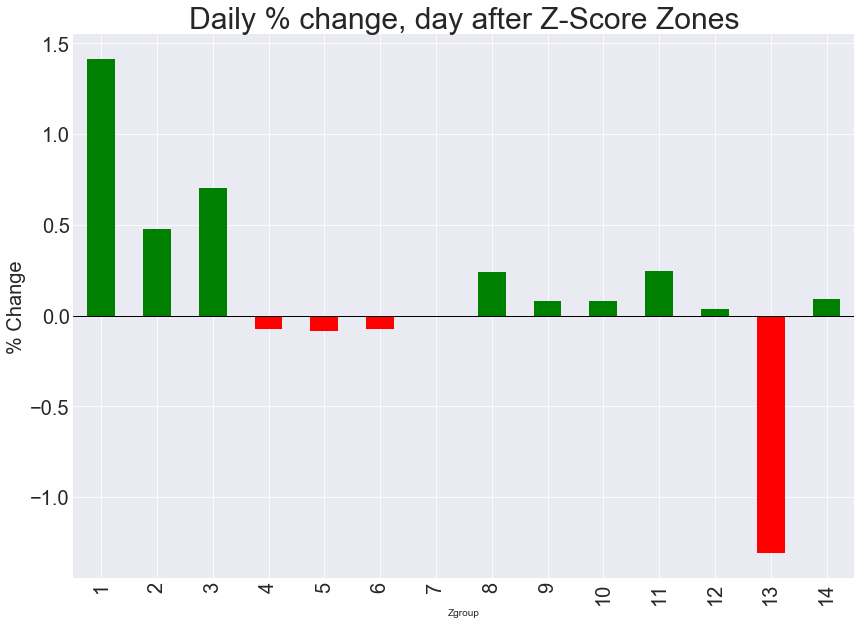

In [9]:
fb.groupby('Zgroup')['Log+1'].mean().plot(kind='bar', figsize=(14,10), fontsize=20,
                color = ['g' if i>0 else 'r' for i in fb.groupby('Zgroup')['Log+1'].mean() ]);
plt.axhline(y=0,linewidth=1, color='k');
plt.title('Daily % change, day after Z-Score Zones', fontsize=30);
plt.ylabel('% Change', fontsize=20);

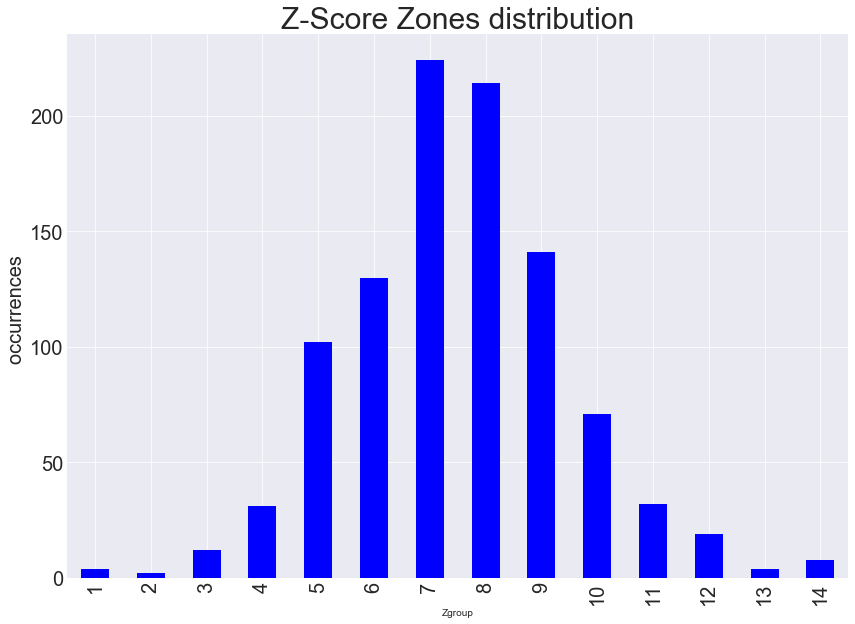

In [10]:
fb.groupby('Zgroup').size().plot(kind='bar', figsize=(14,10), fontsize=20, color='b');
plt.title('Z-Score Zones distribution', fontsize=30);
plt.ylabel('occurrences ', fontsize=20);